<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a00377571/blob/main/Semana6_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey.**




**Marco Antonio Arellano Hernández - A00377571**





#                      SEMANA 6. Visualización de datos.





Materia:       **"Ciencia y analítica de datos."**

**Profesor: María de la Paz Rico Fernández.**

**Fecha: Noviembre 01, 2022**

# ***Instrucciones.***

Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.

Visualización de los datos:

1.- Descarga los datos. Enlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna

4.- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

5.- Realiza el conteo de las variables categóricas.

6.- Escala los datos, si consideras necesario.

7.- Reduce las dimensiones con PCA, si consideras necesario.

    a).- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

    b).- Indica la importancia de las variables en cada componente

8.- Elabora los histogramas de los atributos para visualizar su distribución

9.- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

10.- Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


#1. Descargar y cargar los datos en Python. 

In [228]:
# Importar Pandas y Numpy

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [229]:
# Importar la base de datos existente desde un link de internet

Data = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)

Data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [230]:
#Renombrando de columnas

Data = Data.rename(columns = {'X1': 'CantidadCredito', 
                          'X2': 'Genero', 
                          'X3': 'Escolaridad',
                          'X4': 'EstadoCivil',  
                          'X5': 'Edad',   
                          'X6': 'PagoACuentaSep',
                          'X7': 'PagoACuentaAgo', 
                          'X8': 'PagoACuentaJul', 
                          'X9': 'PagoACuentaJun',
                       'X10': 'PagoACuentaMay', 
                       'X11': 'PagoACuentaAbr', 
                       'X12': 'SaldoSep',
                       'X13': 'SaldoAgo', 
                       'X14': 'SaldoJul', 
                       'X15': 'SaldoJun',
                       'X16': 'SaldoMay', 
                       'X17': 'SaldoAbr', 
                       'X18': 'PagoPrevioSep',
                       'X19': 'PagoPrevioAgo', 
                       'X20': 'PagoPrevioJul', 
                       'X21': 'PagoPrevioJun', 
                       'X22': 'PagoPrevioMay', 
                       'X23': 'PagoPrevioAbr'})
Data.head()

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# **2.-Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna() .**

In [231]:
Data.head()

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [232]:
Data.shape

(30000, 24)

In [233]:
Data.columns

Index(['CantidadCredito', 'Genero', 'Escolaridad', 'EstadoCivil', 'Edad',
       'PagoACuentaSep', 'PagoACuentaAgo', 'PagoACuentaJul', 'PagoACuentaJun',
       'PagoACuentaMay', 'PagoACuentaAbr', 'SaldoSep', 'SaldoAgo', 'SaldoJul',
       'SaldoJun', 'SaldoMay', 'SaldoAbr', 'PagoPrevioSep', 'PagoPrevioAgo',
       'PagoPrevioJul', 'PagoPrevioJun', 'PagoPrevioMay', 'PagoPrevioAbr',
       'Y'],
      dtype='object')

In [234]:
Data.dtypes

CantidadCredito      int64
Genero             float64
Escolaridad        float64
EstadoCivil        float64
Edad               float64
PagoACuentaSep     float64
PagoACuentaAgo     float64
PagoACuentaJul     float64
PagoACuentaJun     float64
PagoACuentaMay     float64
PagoACuentaAbr     float64
SaldoSep           float64
SaldoAgo           float64
SaldoJul           float64
SaldoJun           float64
SaldoMay           float64
SaldoAbr           float64
PagoPrevioSep      float64
PagoPrevioAgo      float64
PagoPrevioJul      float64
PagoPrevioJun      float64
PagoPrevioMay      float64
PagoPrevioAbr      float64
Y                  float64
dtype: object

In [235]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CantidadCredito  30000 non-null  int64  
 1   Genero           29999 non-null  float64
 2   Escolaridad      29998 non-null  float64
 3   EstadoCivil      29998 non-null  float64
 4   Edad             29995 non-null  float64
 5   PagoACuentaSep   29997 non-null  float64
 6   PagoACuentaAgo   29995 non-null  float64
 7   PagoACuentaJul   29993 non-null  float64
 8   PagoACuentaJun   29991 non-null  float64
 9   PagoACuentaMay   29984 non-null  float64
 10  PagoACuentaAbr   29986 non-null  float64
 11  SaldoSep         29989 non-null  float64
 12  SaldoAgo         29989 non-null  float64
 13  SaldoJul         29987 non-null  float64
 14  SaldoJun         29985 non-null  float64
 15  SaldoMay         29983 non-null  float64
 16  SaldoAbr         29990 non-null  float64
 17  PagoPrevioSe

In [236]:
Data.isna()

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna.**

In [237]:
# Verificando si hace falta algun dato

Data.isnull().values.any()

True

In [238]:
# Verificar en que columna hace falta el dato

Data.isnull().any()

CantidadCredito    False
Genero              True
Escolaridad         True
EstadoCivil         True
Edad                True
PagoACuentaSep      True
PagoACuentaAgo      True
PagoACuentaJul      True
PagoACuentaJun      True
PagoACuentaMay      True
PagoACuentaAbr      True
SaldoSep            True
SaldoAgo            True
SaldoJul            True
SaldoJun            True
SaldoMay            True
SaldoAbr            True
PagoPrevioSep       True
PagoPrevioAgo       True
PagoPrevioJul       True
PagoPrevioJun       True
PagoPrevioMay       True
PagoPrevioAbr       True
Y                   True
dtype: bool

In [239]:
# Visualizacion de la base de datos, de registros de pagos y creditos en clientes de Taiwan.
Data

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [240]:
# Eliminar filas con falantes, si eliminamos columnas confaltantes perderíamos mucha información. 
#Las files se reducen de 30,000 a 29,958 lo cual significa una cantidad muy pequeña de perdida de información.
#Primero cambiamos los valores perdidos (null) a verdadero (True.)
Data.dropna(inplace = True)
Data

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [241]:
# Confirmación de que ya no hay faltantes en las columnas

Data.isnull().any()

CantidadCredito    False
Genero             False
Escolaridad        False
EstadoCivil        False
Edad               False
PagoACuentaSep     False
PagoACuentaAgo     False
PagoACuentaJul     False
PagoACuentaJun     False
PagoACuentaMay     False
PagoACuentaAbr     False
SaldoSep           False
SaldoAgo           False
SaldoJul           False
SaldoJun           False
SaldoMay           False
SaldoAbr           False
PagoPrevioSep      False
PagoPrevioAgo      False
PagoPrevioJul      False
PagoPrevioJun      False
PagoPrevioMay      False
PagoPrevioAbr      False
Y                  False
dtype: bool

#Se decide eliminar las filas con valores faltantes pues son pocos.
#Las filas se reducen de 30,000 a 29,958 lo cual significa una cantidad muy pequeña de perdida de información.

In [242]:
# Copia de Data para Limpieza

Data2 = Data.copy()
Data2

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


# **4.-Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.**

In [243]:
Data2.describe()

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [244]:

#Revision de columnas Genero, Escolaridad, EstadoCivil
#para confirmar si tienen la cantidad correcta de categorias como se nos dice en la descripcion de la base de datos.

print(Data2.groupby(['Genero']).size()) # En Genero estamos bien, la descripcion comenta 2 categorias
print(Data2.groupby(['Escolaridad']).size()) # En Escolaridad tenemos un problema, 
                                              #la descripcion menciona 4 categorias y tenemos 6
print(Data2.groupby(['EstadoCivil']).size()) # En EstadoCivil tambien tenemos un problema con 4 categorias, 
                                              #la descripcion menciona 3 categorias



Genero
1.0    11863
2.0    18095
dtype: int64
Escolaridad
0.0       14
1.0    10572
2.0    14009
3.0     4909
4.0      123
5.0      280
6.0       51
dtype: int64
EstadoCivil
0.0       54
1.0    13643
2.0    15939
3.0      322
dtype: int64


In [245]:
#Como la cantidad de valores por categoria incorrecta es muy pequeña, 
#se incorpora las categorias incorrectas a la categoria correcta mas cercana. 
#Es posible que los errores se hayan generado al momento de la entrada de datos.

Data2['Escolaridad'].replace(0, 1, inplace=True)
Data2['Escolaridad'].replace(5, 4, inplace=True)
Data2['Escolaridad'].replace(6, 4, inplace=True)
Data2['EstadoCivil'].replace(0, 1, inplace=True)


In [246]:
# Confirmacion que ahora todas las categorias concuerdan con lo mencionado en la descripcion

print(Data2.groupby(['Genero']).size())
print(Data2.groupby(['Escolaridad']).size())
print(Data2.groupby(['EstadoCivil']).size())

Genero
1.0    11863
2.0    18095
dtype: int64
Escolaridad
1.0    10586
2.0    14009
3.0     4909
4.0      454
dtype: int64
EstadoCivil
1.0    13697
2.0    15939
3.0      322
dtype: int64


In [247]:
#Visualizacion de data final con limpieza aplicada

Data2

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [248]:
Data2.describe()

,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.840810,1.553542,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.743317,0.518304,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 5.- Conteo de variables categóricas.

Las variables categóricas son las que tienen valores finitos, para este ejemplo son : Genero, escolaridad, estado civil, PagoACuentaSep , PagoACuentaAgo , 'PagoACuentaJul' , PagoACuentaJun , PagoACuentaMay , PagoACuentaAbr y la columna Y.

In [249]:
#Importando librerías.
import pandas as pd
import numpy as np 

df= Data2 # Guardamos en otra variable.
df
#eliminamos nombre de columna index.
df.index.name=None
df.head() #mostramos de nuevo df sin nombre ID


,CantidadCredito,Genero,Escolaridad,EstadoCivil,Edad,PagoACuentaSep,PagoACuentaAgo,PagoACuentaJul,PagoACuentaJun,PagoACuentaMay,...,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [250]:
#para ver tamaño de base de datos.
df.shape

(29958, 24)

In [251]:
# Se observa que hay variables categóricas, por lo cual se deben quitar antes de la normalización
# con el objetivo de tener componentes principales que describan con mayor veracidad los datos.
df['Y']

1        1.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
29996    0.0
29997    0.0
29998    1.0
29999    1.0
30000    1.0
Name: Y, Length: 29958, dtype: float64

In [252]:
#Eliminación de las variables categóricas.
df_sin_VarCategoricas=df.drop(columns=['Genero','Escolaridad','EstadoCivil',
                              'PagoACuentaSep','PagoACuentaAgo','PagoACuentaJul','PagoACuentaJun','PagoACuentaMay',
                              'PagoACuentaAbr','Y'
                              ])
df_sin_VarCategoricas.head()
#Aqui se muestra el dataFrame sin conlumnas de variables categóricas.
#Las variables categoricas son las que tienen valores limitados como : genero, escolaridad, etc.

,CantidadCredito,Edad,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [253]:
df_sin_VarCategoricas.shape
#nos hemos quedado con 14 columnas. Se decide  eliminar la columna Y, ya que tambien es categorica.

(29958, 14)

In [254]:
# Calculamos correlación de variables para determinar las que están
# más relacionadas.
df_sin_VarCategoricas.corr()

,CantidadCredito,Edad,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr,PagoPrevioSep,PagoPrevioAgo,PagoPrevioJul,PagoPrevioJun,PagoPrevioMay,PagoPrevioAbr
CantidadCredito,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
SaldoSep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
SaldoAgo,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
SaldoJul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
SaldoJun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
SaldoMay,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
SaldoAbr,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
PagoPrevioSep,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
PagoPrevioAgo,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


# **SaldoAgo y SaldoSep** tienen alta correlación de  .951494


# **SaldoSep y SaldoJul** tienen  alta correlación de .892272

# 6. Escala los datos, si consideras necesario.

In [255]:
#para normalizar se importa libreria
#libreria para las componentes PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
ndf=df_sin_VarCategoricas #guardamos el nuevo data frame sin columnas categóricas en ndf, nuevo data frame.

In [256]:
scaler = StandardScaler()
scaler.fit(ndf)
print(ndf.head())
ndf2=scaler.transform(ndf)
print(ndf2)
pcs=PCA()
pcs.fit(preprocessing.scale(ndf)) # con la función "SCALE", normalizamos y con PCA obtenemos las componentes.

   CantidadCredito  Edad  SaldoSep  SaldoAgo  SaldoJul  SaldoJun  SaldoMay  \
1            20000  24.0    3913.0    3102.0     689.0       0.0       0.0   
2           120000  26.0    2682.0    1725.0    2682.0    3272.0    3455.0   
3            90000  34.0   29239.0   14027.0   13559.0   14331.0   14948.0   
4            50000  37.0   46990.0   48233.0   49291.0   28314.0   28959.0   
5            50000  57.0    8617.0    5670.0   35835.0   20940.0   19146.0   

   SaldoAbr  PagoPrevioSep  PagoPrevioAgo  PagoPrevioJul  PagoPrevioJun  \
1       0.0            0.0          689.0            0.0            0.0   
2    3261.0            0.0         1000.0         1000.0         1000.0   
3   15549.0         1518.0         1500.0         1000.0         1000.0   
4   29547.0         2000.0         2019.0         1200.0         1100.0   
5   19131.0         2000.0        36681.0        10000.0         9000.0   

   PagoPrevioMay  PagoPrevioAbr  
1            0.0            0.0  
2           

PCA()

In [257]:
pcsSummary_df=pd.DataFrame({'Standard deviation':np.sqrt(pcs.explained_variance_),
                            'Proportion of variance':pcs.explained_variance_ratio_,
                            'cumulative proportion':np.cumsum(pcs.explained_variance_ratio_)
                            })
pcsSummary_df=pcsSummary_df.transpose()
pcsSummary_df.columns=['PC{}'.format(i)
                    for i in range(1,len(pcsSummary_df.columns)+1)
                    ]
pcsSummary_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00,0.00
cumulative proportion,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00,1.00


#7.- Reduce las dimensiones con PCA, si consideras necesario.
**-Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%**

**-Indica la importancia de las variables en cada componente.**

In [258]:
#Sumamos la proporcion acumulada para calcular la componente cercana a 93%
pcsSummary_df.iloc[2,8].round(2) #Se calcula que hasta la PC08- componente número 8 se proyecta el 93% de los datos

0.97

- Se concluye que se requieren 8 componentes principales (PC1-PC08), para tener el 93% de la variabilidad.

- Si se tuviera a la mitad, hasta 4 compomentes principales, se perdería aprox el 40% de la información y nuestro data set no sería confiable para aplicar un modelo de regresión lineal.


In [259]:
print(pcs)

PCA()


# INTERPRETACIÓN DE CADA COMPONENTE  EN TÉRMINOS DE LAS VARIABLES ORIGINALES.

In [260]:
#Recortamos las columnas a 8 componentes principales, la que nos de valor acumulativo de 90%
#se crea el data frame entre componentes y variables del data frame original.
pcsComponents_df=pd.DataFrame(pcs.components_.transpose(),
                             columns=pcsSummary_df.columns,
                             index=df_sin_VarCategoricas.iloc[:,0:16].columns).abs()
pcsComponents_df.iloc[:,0:8] # observamos las 8 componentes principales.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
CantidadCredito,0.165507,0.300709,0.378575,0.200103,0.035312,0.078883,0.111239,0.046381
Edad,0.032789,0.071906,0.869471,0.338990,0.039760,0.071461,0.078816,0.027368
SaldoSep,0.372446,0.190793,0.034207,0.063899,0.041391,0.043987,0.008169,0.009341
SaldoAgo,0.383253,0.174644,0.001814,0.007629,0.083164,0.028824,0.032444,0.135636
SaldoJul,0.388264,0.126883,0.034747,0.060528,0.113790,0.099239,0.121162,0.093077
SaldoJun,0.391557,0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157
SaldoMay,0.388505,0.105928,0.033882,0.039553,0.106756,0.099290,0.007584,0.049781
SaldoAbr,0.380672,0.094157,0.018489,0.070616,0.164986,0.069272,0.007892,0.000282
PagoPrevioSep,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,0.201646,0.748694
PagoPrevioAgo,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,0.278835,0.578491


In [261]:
pcsComponents_df.PC1.nlargest(3)

SaldoJun    0.391557
SaldoMay    0.388505
SaldoJul    0.388264
Name: PC1, dtype: float64

Se concluye que las variables que tienen más relación en la componente PC1 son:
 
 Saldo de Junio
 
 Saldo de Mayo
 
 Saldo de Julio

In [262]:
pcsComponents_df.PC2.nlargest(3)

PagoPrevioAgo    0.408391
PagoPrevioJul    0.392339
PagoPrevioSep    0.383194
Name: PC2, dtype: float64

Se concluye que las variables que tienen alta relación en la componente PC2 son:
 
Pago Previo Agosto
 
Pago previo Julio
 
Pago previo Septiembre




In [263]:
pcsComponents_df.PC1.nsmallest(3) # variables con menor importancia en PC1.


Edad             0.032789
PagoPrevioAbr    0.105481
PagoPrevioMay    0.113741
Name: PC1, dtype: float64

In [264]:
pcsComponents_df.PC2.nsmallest(3) # variables con menor importancia en PC2.

Edad        0.071906
SaldoAbr    0.094157
SaldoMay    0.105928
Name: PC2, dtype: float64

# **8.- Elabora los histogramas de los atributos para visualizar su distribución**

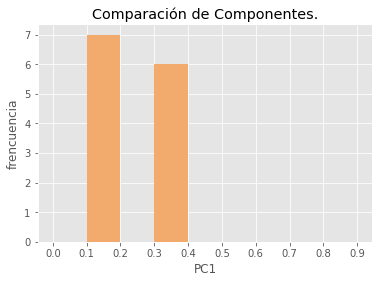

In [265]:

import matplotlib.pyplot as plot

pc1=pcsComponents_df.PC1.nlargest(13)

plot.hist(x=pc1, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], color='#F2AB6D', rwidth=1)
plot.title('Comparación de Componentes.')
plot.xlabel('PC1')
plot.ylabel('frencuencia')
plot.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plot.show() #dibujamos el histograma

1         20000
2        120000
3         90000
4         50000
5         50000
          ...  
29996    220000
29997    150000
29998     30000
29999     80000
30000     50000
Name: CantidadCredito, Length: 29958, dtype: int64


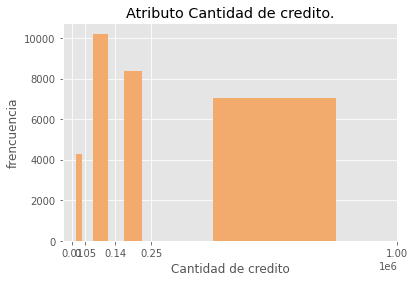

In [279]:
import matplotlib.pyplot as plot

canti=ndf['CantidadCredito']
print(ndf['CantidadCredito'])
intervalos=[10000,50000,140000,250000,1000000]

plot.hist(x=canti, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plot.title('Atributo Cantidad de credito.')
plot.xlabel('Cantidad de credito')
plot.ylabel('frencuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

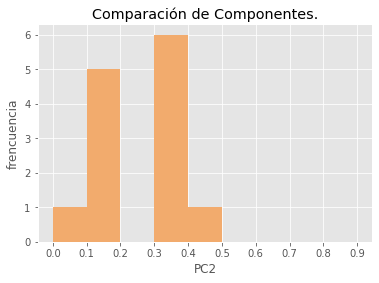

In [277]:
pc2=pcsComponents_df.PC2.nlargest(13)

plot.hist(x=pc2, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], color='#F2AB6D', rwidth=1)
plot.title('Comparación de Componentes.')
plot.xlabel('PC2')
plot.ylabel('frencuencia')
plot.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plot.show() #dibujamos el histograma

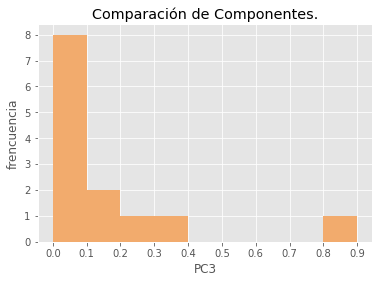

In [278]:
pc3=pcsComponents_df.PC3.nlargest(13)

plot.hist(x=pc3, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], color='#F2AB6D', rwidth=1)
plot.title('Comparación de Componentes.')
plot.xlabel('PC3')
plot.ylabel('frencuencia')
plot.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plot.show() #dibujamos el histograma

# **9.- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

# **#10.- Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

# **Gráfico 1 Boxplot**

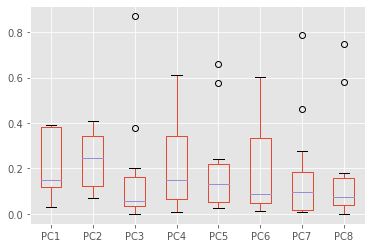

In [280]:
from seaborn.categorical import boxplot
boxplot=pcsComponents_df.iloc[:,:8]
boxplot.boxplot()

Los valores atípicos los tienen las componentes PC3 a PC8.

PC1 y PC2 no muestran valores atípicos.

# **Gráfico 2 - Regplot.**

Aquí se muestra la relación entre las dos variables mayormente correlacionadas.

SaldoAgo y SaldoSep tienen alta correlación de .951494


(0.0, 1040732.6846284478)

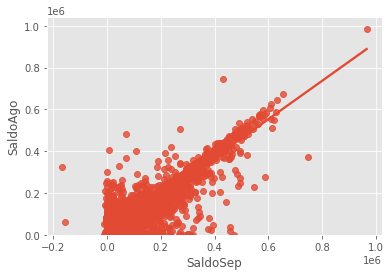

In [281]:
sns.regplot(x='SaldoSep',y='SaldoAgo',data=ndf)
plt.ylim(0,)

# SaldoSep y SaldoJul tienen alta correlación de .892272

(0.0, 1755156.65)

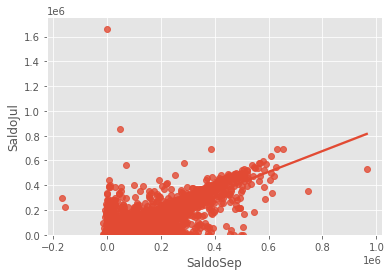

In [282]:
sns.regplot(x='SaldoSep',y='SaldoJul',data=ndf)
plt.ylim(0,)

# **Gráfico 3- Diagrama de dispersión.** 



In [283]:
# ahora se analizan las variables que aportan la mayor cantidad de correlacion con la PC1
#Componente Principal 1 -PC1
import seaborn as sns

x=pcsComponents_df.index
x=x.to_list()
x # se envian a una lista los nombres de cada renglon o fila para graficar.

['CantidadCredito',
 'Edad',
 'SaldoSep',
 'SaldoAgo',
 'SaldoJul',
 'SaldoJun',
 'SaldoMay',
 'SaldoAbr',
 'PagoPrevioSep',
 'PagoPrevioAgo',
 'PagoPrevioJul',
 'PagoPrevioJun',
 'PagoPrevioMay',
 'PagoPrevioAbr']

[]

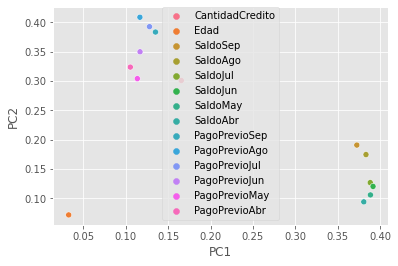

In [284]:
from matplotlib.pyplot import plot

sns.scatterplot(data=pcsComponents_df,x="PC1",y="PC2",hue=pcsComponents_df.index) 
plot(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plot()
